# FIFA World Cup 2018: Do the top teams have significantly different skill?

## Import Dataset

Source: https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset/data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("dataset/fifa-2018-complete-dataset.csv")
df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
df.shape

C:\Users\Elvyna\Miniconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(17981, 74)

In [4]:
df.head(3)

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0


In [5]:
df.shape

(17981, 74)

In [6]:
# df.info()

# all overall columns are not null

In [8]:
print("Number of nations: {} ".format(df.Nationality.nunique()))

Number of nations: 165 


## Data Exploration

I will focus on `overall`, `nationality`, and `preferred positions`. Since each player might have more than one preferred positions, I'll only take the first one to simplify this.

In [9]:
def categorize_position(position):
    pos = ''
    if position.endswith('T') | position.endswith('F') | position.endswith('S'):
        pos = 'Forward'
    elif position.endswith('W'):
        pos = 'Wing'
    elif position.endswith('M'):
        pos = 'Midfielder'
    elif position == 'GK':
        pos = 'Goalkeeper'
    elif position.endswith('B'):
        pos = 'Back'
    return pos

In [10]:
df['position'] = df.apply(lambda x: x['Preferred Positions'].split(' ')[0], axis=1)

df['position_category'] = df.apply(lambda x: categorize_position(x['position']), axis=1)

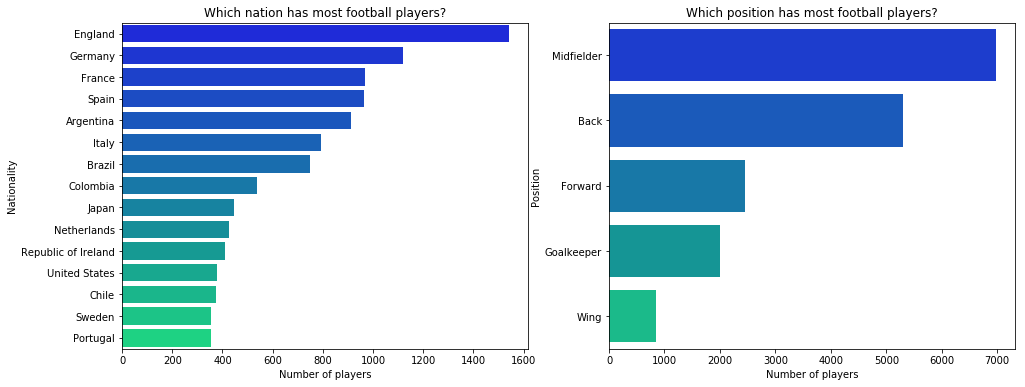

In [11]:
f, ax = plt.subplots(figsize=(16,6), ncols=2)

_df = df.groupby(['Nationality']).agg({'Name':pd.Series.nunique}).sort_values(by='Name',ascending=False).reset_index()

sns.barplot(x=_df['Name'].head(15), 
            y=_df['Nationality'].head(15),
            orient='h',
            palette='winter',
           ax=ax[0])

ax[0].set_xlabel("Number of players")
ax[0].set_ylabel("Nationality")
ax[0].set_title("Which nation has most football players?")

_df = df.groupby(['position_category']).agg({'Name':pd.Series.nunique}).sort_values(by='Name',ascending=False).reset_index()

sns.barplot(x=_df['Name'].head(15), 
            y=_df['position_category'].head(15),
            orient='h',
            palette='winter',
           ax=ax[1])

ax[1].set_xlabel("Number of players")
ax[1].set_ylabel("Position")
ax[1].set_title("Which position has most football players?")
plt.show()

C:\Users\Elvyna\Miniconda3\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Elvyna\Miniconda3\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Elvyna\Miniconda3\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Elvyna\Miniconda3\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Elvyna\Mini

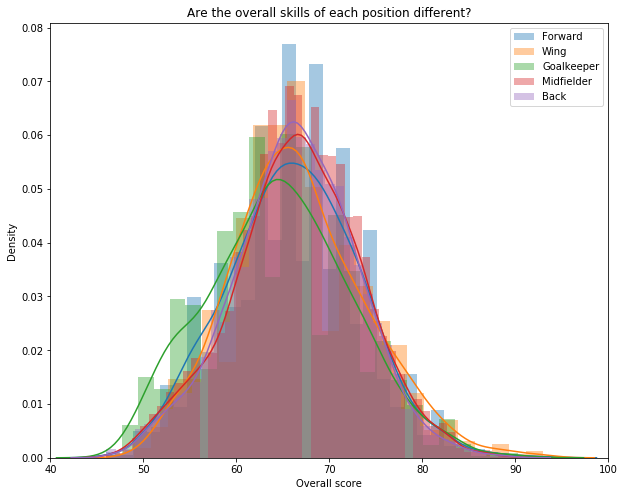

In [12]:
f, ax = plt.subplots(figsize=(10,8))

for pos in df['position_category'].unique():    
    sns.distplot(
        df[(df['position_category'] == pos)]['Overall'],
        ax=ax,
        label=pos
    )
    
plt.legend(loc='upper right')
plt.xlim(40,100)
plt.xlabel("Overall score")
plt.ylabel("Density")
plt.title("Are the overall skills of each position different?")
plt.show()

How is the overall score distribution of the top teams?

C:\Users\Elvyna\Miniconda3\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Elvyna\Miniconda3\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Elvyna\Miniconda3\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Elvyna\Miniconda3\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Germany
count    1140.000000
mean       65.900877
std         6.877570
min        46.000000
25%        62.000000
50%        66.000000
75%        69.000000
max        92.000000
Name: Overall, dtype: float64
Brazil
count    812.000000
mean      70.895320
std        5.323343
min       49.000000
25%       67.000000
50%       71.000000
75%       74.000000
max       92.000000
Name: Overall, dtype: float64
Belgium
count    272.000000
mean      68.095588
std        7.333770
min       55.000000
25%       63.000000
50%       68.000000
75%       72.000000
max       90.000000
Name: Overall, dtype: float64
Portugal
count    367.000000
mean      70.599455
std        5.881833
min       54.000000
25%       67.000000
50%       71.000000
75%       74.000000
max       94.000000
Name: Overall, dtype: float64


C:\Users\Elvyna\Miniconda3\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Argentina
count    965.000000
mean      67.765803
std        6.520242
min       49.000000
25%       63.000000
50%       68.000000
75%       72.000000
max       93.000000
Name: Overall, dtype: float64


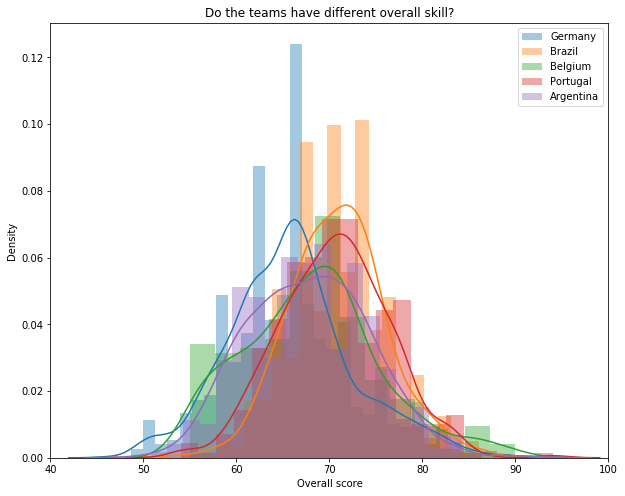

In [13]:
top_teams = ['Germany','Brazil','Belgium','Portugal','Argentina']
    
f, ax = plt.subplots(figsize=(10,8))

for team in top_teams:
    sns.distplot(
        df[(df['Nationality'] == team)]['Overall'],
        ax=ax,
        label=team
    )
    
    print(team)
    print(df[(df['Nationality'] == team)]['Overall'].describe())
    print("====================================================")
    
plt.legend(loc='upper right')
plt.xlim(40,100)
plt.xlabel("Overall score")
plt.ylabel("Density")
plt.title("Do the teams have different overall skill?")
plt.show()

Note: it is the skill distribution of overall player, not the upcoming FIFA World Cup 2018 squad.
Squad details can be accessed [here](https://en.wikipedia.org/wiki/2018_FIFA_World_Cup_squads).

For each team, let's see overall skill distribution based on position_category.

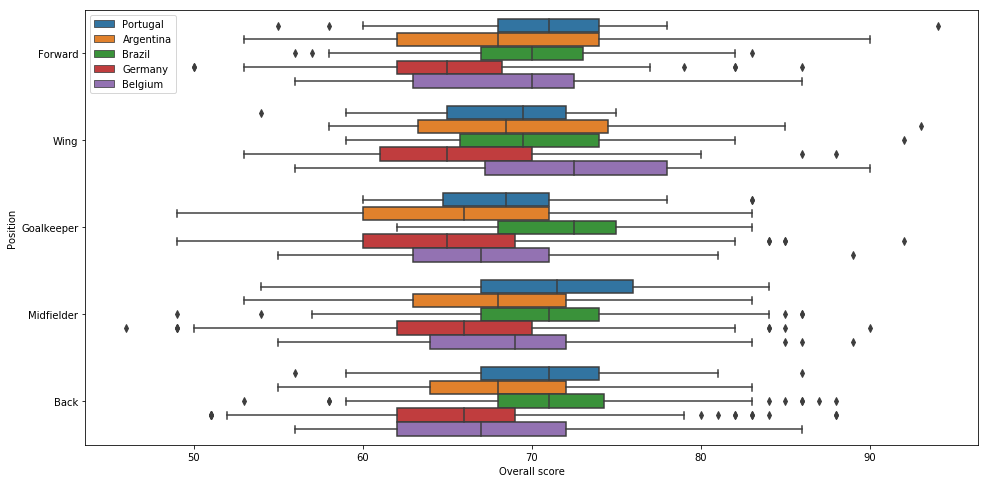

In [22]:
f, ax = plt.subplots(figsize=(16,8))

sns.boxplot(
    data=df[(df['Nationality'].isin(top_teams))],
    y='position_category',
    x='Overall',
    hue='Nationality',
    ax=ax
)

plt.legend(loc='best')
plt.xlabel("Overall score")
plt.ylabel("Position")
plt.show()

**stats.anova_lm**

In [23]:
# What's the difference between using `stats.f_oneway` and `stats.anova_lm` ?
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('Overall ~ C(Nationality)', data=df).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=1)
print(aov_table)

                     df         sum_sq     mean_sq          F  PR(>F)
C(Nationality)    164.0  146626.425471  894.063570  21.779272     0.0
Residual        17816.0  731366.813948   41.051123        NaN     NaN


From this test, the p-value PR(>F) is lower than the significant level (0.05); so we reject the null hypothesis.

**stats.f_oneway**

In [16]:
from scipy.stats import stats

# Perform the ANOVA
stats.f_oneway(df[(df['Nationality'] == top_teams[0])]['Overall'],
               df[(df['Nationality'] == top_teams[1])]['Overall'],
               df[(df['Nationality'] == top_teams[2])]['Overall'],
               df[(df['Nationality'] == top_teams[3])]['Overall'],
               df[(df['Nationality'] == top_teams[4])]['Overall']
                 )

F_onewayResult(statistic=87.03088394011196, pvalue=1.2261311559136119e-70)

The one-way ANOVA test shows significant difference between the top teams. However, which are the different ones?

group1,group2,meandiff,lower,upper,reject
Argentina,Belgium,0.3298,-0.8678,1.5273,False
Argentina,Brazil,3.1295,2.2988,3.9602,True
Argentina,Germany,-1.8649,-2.628,-1.1019,True
Argentina,Portugal,2.8337,1.7638,3.9035,True
Belgium,Brazil,2.7997,1.5776,4.0218,True
Belgium,Germany,-2.1947,-3.3719,-1.0175,True
Belgium,Portugal,2.5039,1.1082,3.8996,True
Brazil,Germany,-4.9944,-5.7955,-4.1934,True
Brazil,Portugal,-0.2959,-1.3931,0.8014,False
Germany,Portugal,4.6986,3.6516,5.7455,True


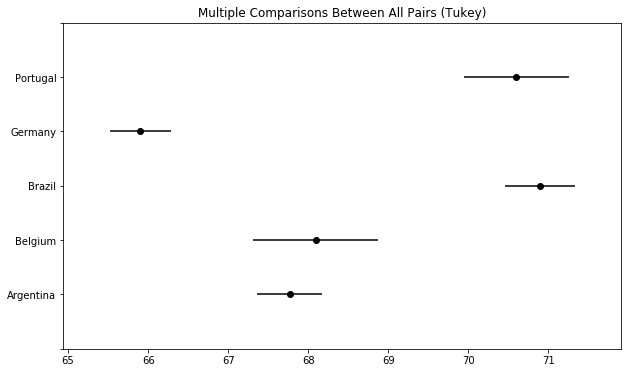

In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df[(df['Nationality'].isin(top_teams))]['Overall'],     # Data
                          groups=df[(df['Nationality'].isin(top_teams))]['Nationality'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
tukey.summary()              # See test summary

Most of the teams are significantly different, except Argentina-Belgium and Brazil-Portugal.

In [24]:
# Next: pick some team pairs which are significantly different, then analyze whether the difference lies between each position.

# ### Brazil and Germany

# Which positions have different skill?

In [25]:
# tukey = pairwise_tukeyhsd(endog=df[(df['Nationality'].isin(['Germany']))]['Overall'],     # Data
#                           groups=df[(df['Nationality'].isin(['Germany']))]['position_category'],   # Groups
#                           alpha=0.05)          # Significance level

# # tukey.plot_simultaneous()    # Plot group confidence intervals
# # plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

# tukey.summary()              # See test summary

Reference:
- http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html
- https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/